# Linear Regression

This week, we will be implementing our own linear regression model and then using scikit to fit linear models.

## The basics of a 1D Linear Regressor

Recall from lecture that a 1D Linear Model is a simple line equation in the form of y = wx + b. To get w and b, we seek to minimize the following function:

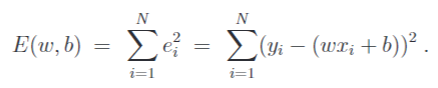

#### Question: what does this function represent?
#### Answer: the sum of squared errors!

#### Solving for w* and b*

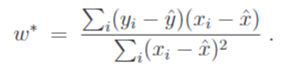

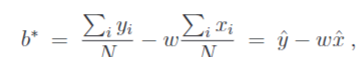

## Implementation of 1D Linear Regressor

In [1]:
import numpy as np

In [2]:
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([10, 20, 27, 40, 50, 60])

In [3]:
def solveW(x, y):
    # If you want a challenge, do not use any loops for either function
    x_avg = x.mean()
    y_avg = y.mean()
    arr_len = x.size

    w_numerator = sum((y - y_avg) * (x - x_avg))
    w_denominator = sum(pow(x - x_avg, 2))

    print(w_numerator)
    print(w_denominator)

    w = w_numerator / w_denominator

    return w

solveW(x,y)

176.5
17.5


10.085714285714285

In [4]:
def solveB(x, y, w):
    # Put your code in this function
    
    b = y.mean() - w * x.mean()
    b
    return b
solveB(x, y, 1)

31.0

In [5]:
def solveSimpleLinearModel(x, y):
    w = solveW(x, y)
    b = solveB(x, y, w)
    return (w, b)

solveSimpleLinearModel(x, y)

176.5
17.5


(10.085714285714285, -0.7999999999999972)

## Creating the model using scikit

In [6]:
from sklearn import linear_model

It is important to learn how to read documentation. Follow this link: https://scikit-learn.org/stable/modules/linear_model.html then write the code to get w and b.

If you encounter an error, spend some time reading the error message to try and understand how to fix it

In [9]:
##################################
########### Code Below ###########
## Follow documentation to make a regressor and set (w, b)
from sklearn.linear_model import LinearRegression

reg = linear_model.LinearRegression()
x_proper = np.reshape(x, (6, 1))
reg.fit(x_proper, y)
w = 10.085714285714285
b = -0.7999999999999972
reg.coef_ = np.array([w])
reg.intercept_ = b


##################################

In [10]:
print (w, b)

10.085714285714285 -0.7999999999999972


In [12]:
##################################
########### Code Below ###########
## Use the regressor to solve for every value of x
reg.predict(x.reshape(-1, 1))

##################################

array([ 9.28571429, 19.37142857, 29.45714286, 39.54285714, 49.62857143,
       59.71428571])

## Multi-Dimensional inputs

We wish to predict CSCC11 grades for incoming students. We have collected some (fake) data with prerequisite marks and cgpas, and decided to explore a linear model for this task.

In [14]:
import pandas as pd
df = pd.read_csv("fakedata.csv")

df

,MATB24 Grade,MATB41 Grade,STAB52 Grade,CGPA,CSCC11 Grade
0,80,80,80,3.7,75
1,90,65,75,3.3,88
2,90,67,75,3.3,87
3,50,51,62,2.5,58
4,72,88,82,3.1,73
5,98,100,95,3.9,97
6,51,58,100,2.9,67


Recall that for multi-dimensional inputs, we want to know the weights for the function f
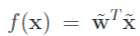

where
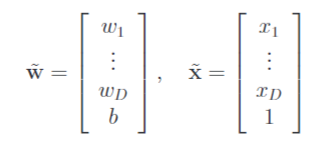

To achieve this, we minimize the energy function
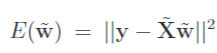

where
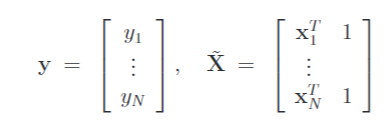

## Creating the CSCC11 Grade Prediction model

In [18]:
##################################
########### Code Below ###########
# Create variables X, y as numpy arrays following the specifications above
y = np.array(df["CSCC11 Grade"])

df["CSCC11 Grade"] = 1      # Set var to predict to `1`
X = np.array(df)            # Convert df to a numpy array
##################################

[1 1 1 1 1 1 1]
[[ 80.   80.   80.    3.7   1. ]
 [ 90.   65.   75.    3.3   1. ]
 [ 90.   67.   75.    3.3   1. ]
 [ 50.   51.   62.    2.5   1. ]
 [ 72.   88.   82.    3.1   1. ]
 [ 98.  100.   95.    3.9   1. ]
 [ 51.   58.  100.    2.9   1. ]]


In [19]:
print(X)
print(y)

[[ 80.   80.   80.    3.7   1. ]
 [ 90.   65.   75.    3.3   1. ]
 [ 90.   67.   75.    3.3   1. ]
 [ 50.   51.   62.    2.5   1. ]
 [ 72.   88.   82.    3.1   1. ]
 [ 98.  100.   95.    3.9   1. ]
 [ 51.   58.  100.    2.9   1. ]]
[1 1 1 1 1 1 1]


In [33]:
print(solveMultiLinearModel(X, y))

[ 0.89182697 -0.07709348  0.38343861 -9.49160953  0.         15.42334637]
